# Cervical Cancer Classification

In [53]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
# Import Cervical Cancer Dataset
cervical_cancer_df = pd.read_csv('./Dataset/kag_risk_factors_cervical_cancer.csv')

In [55]:
cervical_cancer_df.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [56]:
cervical_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [57]:
# Check for missing values
missing_values = cervical_cancer_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV               

In [58]:
# Replacing "?" with NaN
cervical_cancer_df.replace("?", pd.NA, inplace=True)
# Checking for missing values again
missing_values = cervical_cancer_df.isnull().sum()
print("Missing Values after replacement:\n", missing_values)

Missing Values after replacement:
 Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105

In [59]:
# Remove rows with missing values
cervical_cancer_df.fillna(0, inplace=True)
# Checking the dataset after removing missing values
print("Dataset after removing missing values:\n", cervical_cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [60]:
cervical_cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
cervical_cancer_df['Biopsy'].value_counts()/858 * 100

Biopsy
0    93.589744
1     6.410256
Name: count, dtype: float64

In [62]:
# Training and Testing Data
X = cervical_cancer_df.drop('Biopsy', axis=1)
y = cervical_cancer_df['Biopsy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Displaying the shape of the training and testing data
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (686, 35)
Testing Data Shape: (172, 35)


SVM Classifier Accuracy: 0.9476744186046512
SVM Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       161
           1       0.56      0.82      0.67        11

    accuracy                           0.95       172
   macro avg       0.77      0.89      0.82       172
weighted avg       0.96      0.95      0.95       172



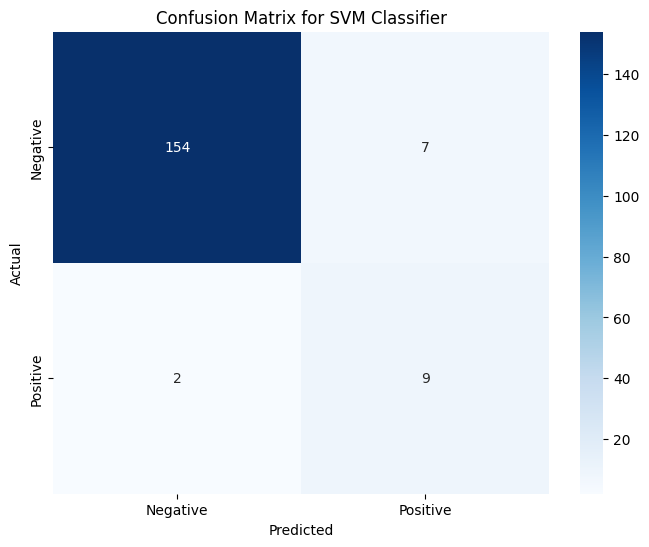

In [ ]:
# Training SVM Classifier
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
# Evaluating the SVM Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_svm = svm_classifier.predict(X_test)
print("SVM Classifier Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classifier Classification Report:\n", classification_report(y_test, y_pred_svm))
# Confusion Matrix for SVM Classifier
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Classifier Accuracy: 0.9186046511627907
Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       161
           1       0.40      0.55      0.46        11

    accuracy                           0.92       172
   macro avg       0.68      0.74      0.71       172
weighted avg       0.93      0.92      0.92       172



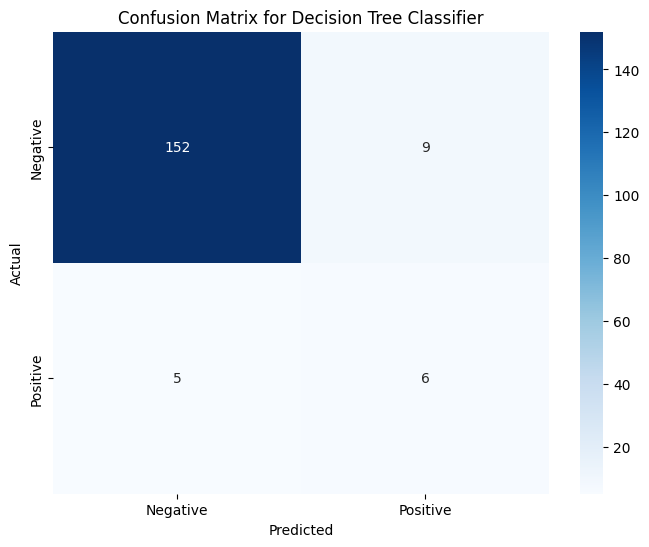

In [64]:
# Implementing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)
# Evaluating the Decision Tree Classifier
y_pred_tree = decision_tree_classifier.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Classifier Classification Report:\n", classification_report(y_test, y_pred_tree))
# Confusion Matrix for Decision Tree Classifier
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Classifier Accuracy: 0.9418604651162791
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       161
           1       0.57      0.36      0.44        11

    accuracy                           0.94       172
   macro avg       0.76      0.67      0.71       172
weighted avg       0.93      0.94      0.94       172



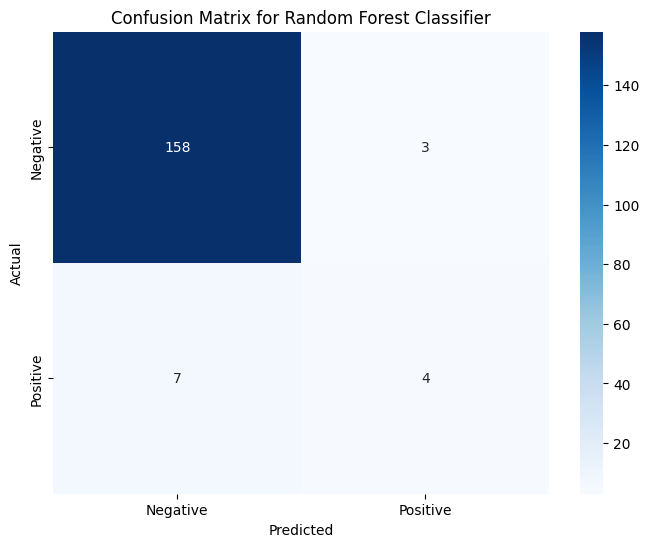

In [65]:
# Implementing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)
# Evaluating the Random Forest Classifier
y_pred_forest = random_forest_classifier.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Random Forest Classifier Classification Report:\n", classification_report(y_test, y_pred_forest))
# Confusion Matrix for Random Forest Classifier
confusion_matrix_forest = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
